<a href="https://colab.research.google.com/github/asouzujoseph/Machine-learning-with-Python/blob/main/Clustering/electricity_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# === NOTEBOOK & IMPORT SETUP ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
import datetime
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

pd.set_option("display.max_columns", None)
%matplotlib inline

# Dataset: Electricity Demand
***
In this assignment you will study the electricity consumption of large corporations in Portugal from the years 2011 to 2014.

The dataset contains 370 columns and 140256 rows:
- Each **column** represents the power consumption data from one of 370 distinct consumers (labeled MT_001, MT_002, ... , MT_370) from Jan 1, 2011 to Dec 31 2015. The data is provided in 15 minutes increments, which results in 140256 rows: $(60min/15min) \times 24hrs \times 365days \times 4years + 96 = 140256$ (+96 is to account for Feb 29, 2012).
- Each **row** represents all consumers' power consumption at a particular 15 minute increment. 

The dataset can be downloaded here:
- https://archive.ics.uci.edu/ml/datasets/ElectricityLoadDiagrams20112014#)
- *Data Folder* -> *LD2011_2014.txt.zip* -> *unzip* -> place in same directory as notebook


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Preparation

*Make sure to update the `pathToFolder` variable if the file isn't saved in the same directory as the notebook.*

In [ ]:
# Set paths
folderPath = "" # leave string empty if file in local dir
filePath = "/content/drive/My Drive/Colab Notebooks/LD2011_2014.txt"

path = os.path.join(folderPath, filePath)

# Replace "," by ".", otherwise the numbers will be in the form 2,3445 instead of 2.3445
import fileinput
with fileinput.FileInput(path, inplace=True, backup='.bak') as file:
    for line in file:
        print(line.replace(",", "."), end='')
        
# Load dataset
df = pd.read_csv(path, sep=";", index_col=0)      
df.head()

,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,71.770335,0.0,0.0,0.0,0.0,0.0,0.0,260.416667,45.721750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.203369,0.0,38.342246,20.363985,0.0,1935.185185,158.006363,1965.437788,0.0,0.0,838.461538,0.0,50.756208,24.570605,0.0,137.885196,80.797011,0.0,74.562212,76.792763,41.482587,0.0,0.0,0.0,93.291732,0.0,39.588859,45.717456,0.0,0.0,0.0,13.422819,22.123746,205.835962,327.859238,920.863309,285.607755,266.521027,1826.271186,218.274112,12166.666667,76.612903,148.867314,272.935780,428.414097,173.089071,235.492958,319.354839,447.761194,288.135593,110.538373,345.578231,4235.294118,260.93750,472.868217,84.0,232.558140,603.036876,199.592668,207.532051,1328.903654,113.074205,680.529301,204.301075,1278.481013,81.728267,444.000000,517.333333,0.0,189.121951,325.833980,228.249744,3263.157895,582.689335,62.219731,380.410959,58.148148,84.924782,38.108720,450.

In [ ]:
# Should be (140256, 370)
df.shape

(140256, 370)

In [ ]:
# create a copy for use in Part 2 (in case the original gets modified)
df_original = df.copy()

# Part 1: Exploratory Data Analysis [15 points total]
***

We will start off by simply getting to know our dataset. This will help us gain some intuition surrounding salient patterns in the data, which will help us later down the road once we starting building machine learning models. 

For this section we will be heavily utilizing `pandas.Grouper` and `pandas.DatetimeIndex`, which provide some very helpful functionality for manipulating, aggregating, and visualizing datetime data with pandas dataframes. If you aren't familiar with working with dates in pandas, you may want to spend a few mintues reading up on the documentation. Here are a few useful links:
- https://pandas.pydata.org/docs/reference/api/pandas.Grouper.html
- https://pandas.pydata.org/docs/user_guide/timeseries.html
- https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/
- https://adriangcoder.medium.com/pandas-tricks-and-tips-a7b87c3748ea 

> **Be sure to run the following transformation on the data before proceeding! This will convert our pandas dataframe index to a DatatimeIndex**

In [ ]:
df.index = pd.to_datetime(df.index)

# Should now be a `DatetimeIndex`
df.index

DatetimeIndex(['2011-01-01 00:15:00', '2011-01-01 00:30:00',
               '2011-01-01 00:45:00', '2011-01-01 01:00:00',
               '2011-01-01 01:15:00', '2011-01-01 01:30:00',
               '2011-01-01 01:45:00', '2011-01-01 02:00:00',
               '2011-01-01 02:15:00', '2011-01-01 02:30:00',
               ...
               '2014-12-31 21:45:00', '2014-12-31 22:00:00',
               '2014-12-31 22:15:00', '2014-12-31 22:30:00',
               '2014-12-31 22:45:00', '2014-12-31 23:00:00',
               '2014-12-31 23:15:00', '2014-12-31 23:30:00',
               '2014-12-31 23:45:00', '2015-01-01 00:00:00'],
              dtype='datetime64[ns]', length=140256, freq=None)

Once we have converted our dataframe's index to a `pd.DatetimeIndex`, we can group by any timeframe we like using the `freq` argument of the `pd.Grouper` module as follows:

In [ ]:
# Group by month
monthly_data = df.groupby(pd.Grouper(freq='m'), as_index=True).mean()
print('Monthly_data shape', monthly_data.shape)
monthly_data.head()

Monthly_data shape (49, 370)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.935628,0.0,0.0,0.0,0.0,0.0,0.0,148.820028,9.813984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.108541,0.0,80.804467,92.925368,0.0,2125.310717,352.850638,2639.738218,0.000000,0.0,1414.961049,0.0,137.490942,39.239881,0.0,244.632095,127.112463,0.0,114.197183,139.612616,77.535409,0.0,0.0,0.0,157.078273,0.0,48.800123,84.791559,0.0,0.0,0.0,28.709041,29.980690,437.389391,428.086252,1866.571549,439.709736,352.330774,2953.234582,472.469678,22155.168067,159.695039,263.626445,466.502968,833.308777,276.195502,246.374435,556.714918,841.329989,527.584390,212.947337,814.096153,6921.638302,504.294905,776.621718,187.215294,416.685297,1369.656756,393.051053,410.917367,2141.582959,193.025804,1374.418834,386.668112,2842.855015,161.821005,860.585322,709.393389,0.0,320.348747,491.252811,277.625040,5450.703229,1028.170353,96.486415,663.987015,109.795095,136.9634

Notice that my dataframe now only has 49 rows (one per month), and each index value corresponds to a particular month. By calling the `mean` function on the grouped dataframe, pandas will take the average across all values within each month. 

This functionality is very powerful, and is very useful when working with timeseries data (a common task in data science).

## A) Data Inspection [3 points]

Let's start off by performing some basic sanity checks to assess the correctness and completeness of the data:
- Inspect the dates to make sure they are what you'd expect (365 days a year, 12 months a year, etc.). Are there any gaps?
- Next, inspect the average and total consumption of each user (MT_001, MT_002, etc.). Are there any significant outliers?
- Perform any additional checks you think might be worthwhile to help you better understand the data



In [ ]:
### Inspection of data
daily = df.groupby(pd.Grouper(freq='d'), as_index=True).sum() # group by day
pd.date_range(start="2011-01-01", end="2015-01-01").difference(daily.index)   # search for gaps in days between consecutive rows

DatetimeIndex([], dtype='datetime64[ns]', freq='D')

There are no gaps in the data

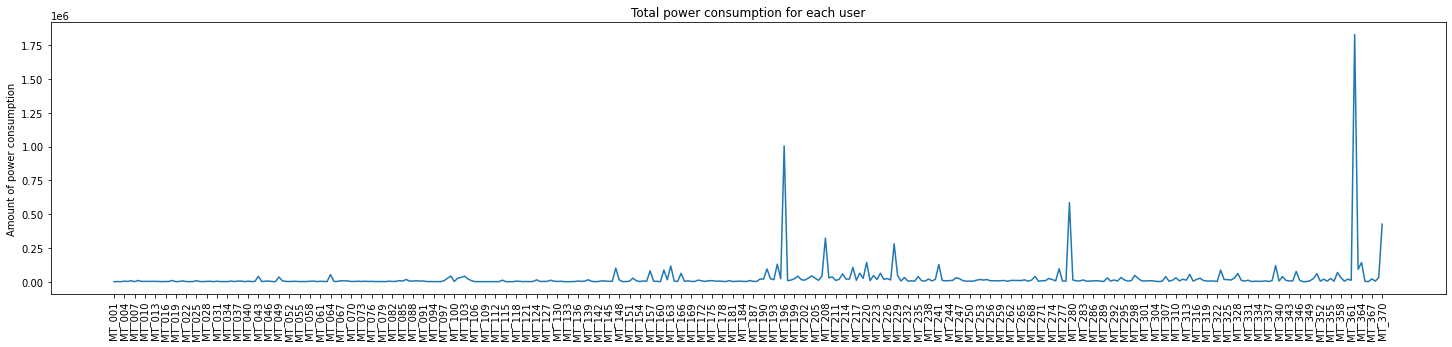

In [ ]:
### Outliers
vv = monthly_data.agg(['sum', 'mean']); # aggregate date and extract mean and sum of values
vv =vv.T # transpose dataframe to allow clustering of consumers
plt.figure(figsize=(25,5));
plt.plot(vv['sum']);
plt.xticks(vv.index[::3],  rotation='vertical');
plt.title("Total power consumption for each user")
plt.ylabel("Amount of power consumption");

There are about 3 consumers that have very high consumption in relation to other consumers.

## B) Yearly Consumption [3 points]

Group the data by year and investigate trends. You analysis could include (but is not restricted to):
- Is consumption going up year over year (only for certain users or for all users)?
- How many active/inactive users are there from year to year (active is defined as consumption>0)



In [ ]:
# Group by year
yearly_data = df.groupby(pd.Grouper(freq='y'), as_index=True).mean()
print('Yearly shape', yearly_data.shape)
m,n =yearly_data.shape
yearly_data.head()

Yearly shape (5, 370)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,283.706426,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.161717,10.223003,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

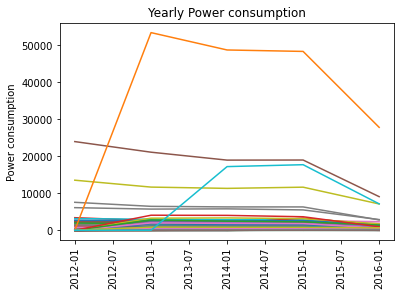

In [ ]:
plt.plot(yearly_data);
plt.xticks(rotation=90);
plt.title("Yearly Power consumption");
plt.ylabel("Power consumption");

Some consumers had consistent reduction in power usage over the years whereas other consumers had increased power usage followed by reduction in the amount of electricity over the years.

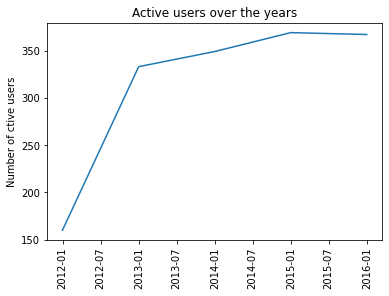

In [ ]:
activity = yearly_data[yearly_data>0]
yearly_data["active"] = n - activity.isnull().sum(axis=1)
plt.plot(yearly_data["active"]);
plt.xticks(rotation=90);
plt.title("Active users over the years");
plt.ylabel("Number of ctive users");

There was noticeable increase in the number of users over the years.

## C) Monthly and Weekly Consumption [6 points]

Group the data by month and week and investigate trends. Your analysis could include (but is not restricted to):
- Which months/weeks typically have the highest energy demand?
- Plot the data of "high consumption users", "moderate consumption users", and "low consumption users" over time. You will likely need to sample a few users in each group as there may be too many to plot at once. 
- Are certain users more/less active at different times of year?
- You may also want to isolate the years individually (or aggregate the data by month *across all years*) to reduce noise and hone in on particular trends

In [ ]:
# Group by month
monthly_data = df.groupby(pd.Grouper(freq='m'), as_index=True).mean()
print('Monthly_data shape', monthly_data.shape)
monthly_data.head()

Monthly_data shape (49, 370)


,MT_001,MT_002,MT_003,MT_004,MT_005,MT_006,MT_007,MT_008,MT_009,MT_010,MT_011,MT_012,MT_013,MT_014,MT_015,MT_016,MT_017,MT_018,MT_019,MT_020,MT_021,MT_022,MT_023,MT_024,MT_025,MT_026,MT_027,MT_028,MT_029,MT_030,MT_031,MT_032,MT_033,MT_034,MT_035,MT_036,MT_037,MT_038,MT_039,MT_040,MT_041,MT_042,MT_043,MT_044,MT_045,MT_046,MT_047,MT_048,MT_049,MT_050,MT_051,MT_052,MT_053,MT_054,MT_055,MT_056,MT_057,MT_058,MT_059,MT_060,MT_061,MT_062,MT_063,MT_064,MT_065,MT_066,MT_067,MT_068,MT_069,MT_070,MT_071,MT_072,MT_073,MT_074,MT_075,MT_076,MT_077,MT_078,MT_079,MT_080,MT_081,MT_082,MT_083,MT_084,MT_085,MT_086,MT_087,MT_088,MT_089,MT_090,MT_091,MT_092,MT_093,MT_094,MT_095,MT_096,MT_097,MT_098,MT_099,MT_100,MT_101,MT_102,MT_103,MT_104,MT_105,MT_106,MT_107,MT_108,MT_109,MT_110,MT_111,MT_112,MT_113,MT_114,MT_115,MT_116,MT_117,MT_118,MT_119,MT_120,MT_121,MT_122,MT_123,MT_124,MT_125,MT_126,MT_127,MT_128,MT_129,MT_130,MT_131,MT_132,MT_133,MT_134,MT_135,MT_136,MT_137,MT_138,MT_139,MT_140,MT_141,MT_142,MT_143,MT_144,MT_145,MT_146,MT_147,MT_148,MT_149,MT_150,MT_151,MT_152,MT_153,MT_154,MT_155,MT_156,MT_157,MT_158,MT_159,MT_160,MT_161,MT_162,MT_163,MT_164,MT_165,MT_166,MT_167,MT_168,MT_169,MT_170,MT_171,MT_172,MT_173,MT_174,MT_175,MT_176,MT_177,MT_178,MT_179,MT_180,MT_181,MT_182,MT_183,MT_184,MT_185,MT_186,MT_187,MT_188,MT_189,MT_190,MT_191,MT_192,MT_193,MT_194,MT_195,MT_196,MT_197,MT_198,MT_199,MT_200,MT_201,MT_202,MT_203,MT_204,MT_205,MT_206,MT_207,MT_208,MT_209,MT_210,MT_211,MT_212,MT_213,MT_214,MT_215,MT_216,MT_217,MT_218,MT_219,MT_220,MT_221,MT_222,MT_223,MT_224,MT_225,MT_226,MT_227,MT_228,MT_229,MT_230,MT_231,MT_232,MT_233,MT_234,MT_235,MT_236,MT_237,MT_238,MT_239,MT_240,MT_241,MT_242,MT_243,MT_244,MT_245,MT_246,MT_247,MT_248,MT_249,MT_250,MT_251,MT_252,MT_253,MT_254,MT_255,MT_256,MT_257,MT_258,MT_259,MT_260,MT_261,MT_262,MT_263,MT_264,MT_265,MT_266,MT_267,MT_268,MT_269,MT_270,MT_271,MT_272,MT_273,MT_274,MT_275,MT_276,MT_277,MT_278,MT_279,MT_280,MT_281,MT_282,MT_283,MT_284,MT_285,MT_286,MT_287,MT_288,MT_289,MT_290,MT_291,MT_292,MT_293,MT_294,MT_295,MT_296,MT_297,MT_298,MT_299,MT_300,MT_301,MT_302,MT_303,MT_304,MT_305,MT_306,MT_307,MT_308,MT_309,MT_310,MT_311,MT_312,MT_313,MT_314,MT_315,MT_316,MT_317,MT_318,MT_319,MT_320,MT_321,MT_322,MT_323,MT_324,MT_325,MT_326,MT_327,MT_328,MT_329,MT_330,MT_331,MT_332,MT_333,MT_334,MT_335,MT_336,MT_337,MT_338,MT_339,MT_340,MT_341,MT_342,MT_343,MT_344,MT_345,MT_346,MT_347,MT_348,MT_349,MT_350,MT_351,MT_352,MT_353,MT_354,MT_355,MT_356,MT_357,MT_358,MT_359,MT_360,MT_361,MT_362,MT_363,MT_364,MT_365,MT_366,MT_367,MT_368,MT_369,MT_370
2011-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.935628,0.0,0.0,0.0,0.0,0.0,0.0,148.820028,9.813984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.108541,0.0,80.804467,92.925368,0.0,2125.310717,352.850638,2639.738218,0.000000,0.0,1414.961049,0.0,137.490942,39.239881,0.0,244.632095,127.112463,0.0,114.197183,139.612616,77.535409,0.0,0.0,0.0,157.078273,0.0,48.800123,84.791559,0.0,0.0,0.0,28.709041,29.980690,437.389391,428.086252,1866.571549,439.709736,352.330774,2953.234582,472.469678,22155.168067,159.695039,263.626445,466.502968,833.308777,276.195502,246.374435,556.714918,841.329989,527.584390,212.947337,814.096153,6921.638302,504.294905,776.621718,187.215294,416.685297,1369.656756,393.051053,410.917367,2141.582959,193.025804,1374.418834,386.668112,2842.855015,161.821005,860.585322,709.393389,0.0,320.348747,491.252811,277.625040,5450.703229,1028.170353,96.486415,663.987015,109.795095,136.9634

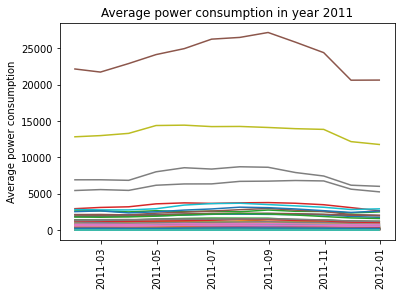

In [ ]:
year_2011 = monthly_data['2010-12-31':'2011-12-31']
plt.plot(year_2011);
plt.xticks(rotation=90);
plt.title("Average power consumption in year 2011");
plt.ylabel("Average power consumption");


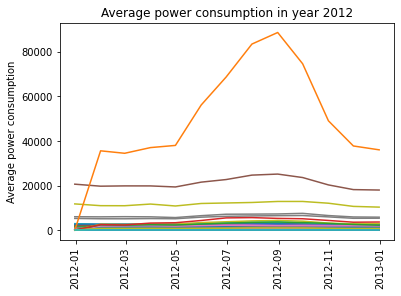

In [ ]:
year_2012 = monthly_data['2011-12-31':'2012-12-31'] 
plt.plot(year_2012);
plt.xticks(rotation=90);
plt.title("Average power consumption in year 2012");
plt.ylabel("Average power consumption");

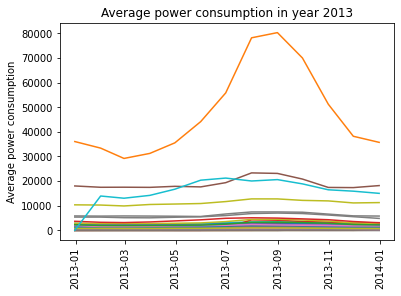

In [ ]:
year_2013 =monthly_data['2012-12-31':'2013-12-31']
plt.plot(year_2013);
plt.xticks(rotation=90);
plt.title("Average power consumption in year 2013");
plt.ylabel("Average power consumption");

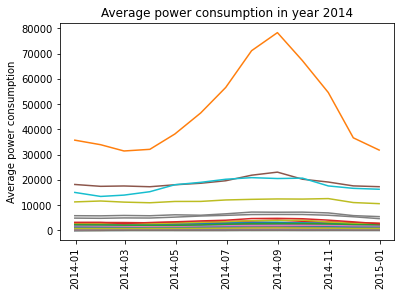

In [ ]:
year_2014 = monthly_data['2013-12-31':'2015-01-01']
plt.plot(year_2014);
plt.xticks(rotation=90);
plt.title("Average power consumption in year 2014");
plt.ylabel("Average power consumption");

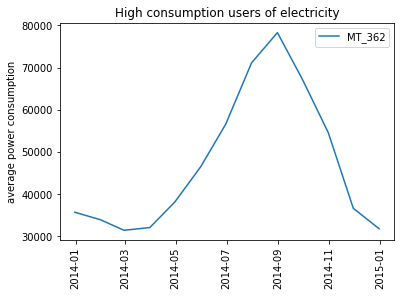

In [ ]:
## High users
High_user =monthly_data[monthly_data>30000]  # MT_362 == True
plt.plot(year_2014["MT_362"],label="MT_362");
plt.title("High consumption users of electricity");
plt.ylabel("average power consumption");
plt.xticks(rotation=90);
plt.legend();

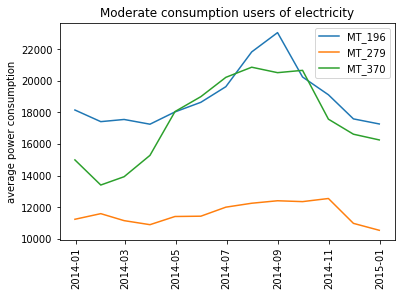

In [ ]:
# moderate consumption users
moderate_users =monthly_data[(monthly_data>10000) & (monthly_data<30000)]  # True == Mt_370, MT_279, MT_196
plt.plot(year_2014["MT_196"], label="MT_196");
plt.plot(year_2014["MT_279"], label="MT_279");
plt.plot(year_2014["MT_370"], label="MT_370");
plt.title("Moderate consumption users of electricity");
plt.ylabel("average power consumption");
plt.xticks(rotation=90);
plt.legend();

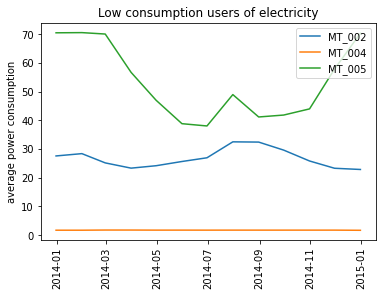

In [ ]:
# low consumption users
low_users =monthly_data[(monthly_data<10000)]  #plot a sample since there are many low consumption users of electricity in the dataset
# plt.plot(year_2014["MT_001"], label="MT_001");
plt.plot(year_2014["MT_002"], label="MT_002");
plt.plot(year_2014["MT_003"], label="MT_004");
# plt.plot(year_2014["MT_004"], label="MT_004");
plt.plot(year_2014["MT_005"], label="MT_005");
plt.title("Low consumption users of electricity");
plt.ylabel("average power consumption");
plt.xticks(rotation=90);
plt.legend(loc =1);

The highest demand of energy occurred in August / september over the years. 
Generally, there are peaks in electricity consumption in winter months and summer months.

## D) Manual Segmentation [3 points]

Based on your analsysis above, try to segment the users into as many groups as you deem appropriate. Think of this like a "manual clustering exercise". For instance, there may be certain users who are really active in the later months of the year, while other users are more active in the earlier months. 

In [ ]:
# [your code here]
High_users =monthly_data[monthly_data>30000]
moderate_users =monthly_data[(monthly_data>10000) & (monthly_data<30000)]
low_users =monthly_data[(monthly_data<10000)]


# Part 2: Clustering [15 points]

Now that we have a good handle on our data, let's see if we can toss some clustering algorithms into the mix and segment our users into distinct groups. For this section, we **focus on the year 2014 only** to simplify things.

For this task we will consider **electricity consumption in each 15 minute interval to be a distinct feature**, so depending how we group the data we will have a different number of features (e.g. if we group the data by month, we will have 12 features, if we group by week we have 365 features). 

We have done some basic preprocessing for you to get you started:
- Groupby week as a starting point (you could try grouping by day, or even hour)
- Drop users with zero consumption to reduce noise (there shouldn't be more than a handful of these in any of 2013 and 2014)
- Normalize data to "percent of total yearly consumption" for each user. The levels of consumption vary signifiacntly across users, which - as is the case for most ML algos - can make clustering difficult. For instance, some users' average monthly consumption is ~10000, while others is as high as ~1,000,000 (you should have seen this in your earlier analysis). There are many potential techniques to normalize data however, and you are encouraged to experiment as you will likely get different results. 

In [ ]:
# ensure we are working with the original df in case it got modified in part 1
df = df_original.copy()

# Convert index to datetime index
df.index = pd.to_datetime(df.index)

# Isolate  2014
df_2014 = df[df.index.year.isin([2014])].copy()
# df_2014 = year_2014.copy()

# Group data by d/w/m (Change `freq` if you want to experiment)
df_2014 = df_2014.groupby(pd.Grouper(freq='w')).sum()

# Drop users with 0 consumption in selected year
users_with_zero_consumption = df.columns[df_2014.sum()==0]
print("Dropping users with zero consumption:", users_with_zero_consumption)
df_2014 = df_2014.drop(users_with_zero_consumption, axis=1)

# Normalize data to percent of total yearly consumption
df_2014 = df_2014/df_2014.sum()

# Transpose
df_2014 = df_2014.T

# 393 observations, each with 53 features (if using freq='w')
df_2014.shape

Dropping users with zero consumption: Index(['MT_223'], dtype='object')


(369, 53)

## A) Cluster Yearly Usage [6 points]

To start, lets try to clustering our ~370 users by their consumptions patterns throughout the year. Start with KMeans and try to find the optimal number of clusters using the appropriate metrics. 

Play with different temporal aggregations (day, week, month, etc.), different clustering algorithms, or even different normalization and precprocessing steps. 

Once you have settled on a optimal set of clusters, explain what they mean in simple business language. Be sure to visualize the clusters to help explain your results. 

In [ ]:
# convert timestamps to string
df_2014.columns = [col.strftime('%Y %M %d') 
               if (isinstance(col, datetime.date))
               else col
               for col in df_2014.columns]

In [ ]:
df_2014.head()

,2014 00 05,2014 00 12,2014 00 19,2014 00 26,2014 00 02,2014 00 09,2014 00 16,2014 00 23,2014 00 02,2014 00 09,2014 00 16,2014 00 23,2014 00 30,2014 00 06,2014 00 13,2014 00 20,2014 00 27,2014 00 04,2014 00 11,2014 00 18,2014 00 25,2014 00 01,2014 00 08,2014 00 15,2014 00 22,2014 00 29,2014 00 06,2014 00 13,2014 00 20,2014 00 27,2014 00 03,2014 00 10,2014 00 17,2014 00 24,2014 00 31,2014 00 07,2014 00 14,2014 00 21,2014 00 28,2014 00 05,2014 00 12,2014 00 19,2014 00 26,2014 00 02,2014 00 09,2014 00 16,2014 00 23,2014 00 30,2014 00 07,2014 00 14,2014 00 21,2014 00 28,2015 00 04
MT_001,0.007264,0.011352,0.012771,0.010504,0.011334,0.010468,0.011504,0.010102,0.011013,0.010852,0.010156,0.008799,0.015832,0.013860,0.010915,0.009897,0.021642,0.009558,0.038786,0.023926,0.023578,0.008362,0.018349,0.006551,0.012271,0.006443,0.009362,0.013967,0.008103,0.008202,0.042427,0.058196,0.074269,0.075688,0.078401,0.071279,0.072556,0.014172,0.006640,0.006818,0.008639,0.009049,0.006577,0.006872,0.008594,0.009808,0.009165,0.010834,0.009665,0.009986,0.009362,0.010281,0.004998
MT_002,0.013721,0.020427,0.020526,0.020846,0.020766,0.018237,0.019162,0.017181,0.016333,0.016517,0.017100,0.017193,0.016492,0.016393,0.017428,0.016499,0.018123,0.019156,0.018347,0.019123,0.017586,0.018422,0.018196,0.019609,0.019044,0.020317,0.020700,0.024060,0.024118,0.023907,0.023590,0.023821,0.023654,0.023845,0.021817,0.023063,0.021681,0.021319,0.019684,0.019504,0.018552,0.018213,0.018751,0.017475,0.016605,0.016589,0.016864,0.016715,0.016481,0.016509,0.016251,0.016332,0.007158
MT_003,0.011328,0.019552,0.019552,0.019552,0.019552,0.019552,0.019552,0.019552,0.019552,0.019552,0.019552,0.019552,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.019204,0.016433,0.008224
MT_004,0.016344,0.021300,0.021836,0.022714,0.023413,0.024420,0.023311,0.023054,0.021852,0.021035,0.018989,0.019639,0.020800,0.021665,0.019199,0.017707,0.018617,0.017263,0.017336,0.017613,0.016926,0.016934,0.017103,0.017960,0.016763,0.016631,0.016591,0.017447,0.017894,0.017168,0.017444,0.017152,0.016481,0.017142,0.017081,0.017641,0.017270,0.017054,0.017064,0.016876,0.016735,0.017882,0.017480,0.017152,0.019232,0.020253,0.020455,0.020288,0.020977,0.022697,0.022825,0.023307,0.009991
MT_005,0.018503,0.025221,0.026016,0.026665,0.025992,0.026718,0.026285,0.026103,0.023869,0.022473,0.017984,0.018508,0.023525,0.023423,0.016591,0.014232,0.016032,0.014526,0.013812,0.013798,0.015490,0.014646,0.014141,0.013648,0.015020,0.013660,0.014439,0.017225,0.018743,0.018519,0.019542,0.015318,0.013772,0.015886,0.015569,0.015291,0.015795,0.015822,0.015093,0.014911,0.016268,0.017860,0.016000,0.015135,0.021109,0.022142,0.021658,0.022212,0.023343,0.026104,0.026413,0.027204,0.011750


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# import random
# scaler = MinMaxScaler()
# df_2014_scaled = scaler.fit_transform(df_2014)

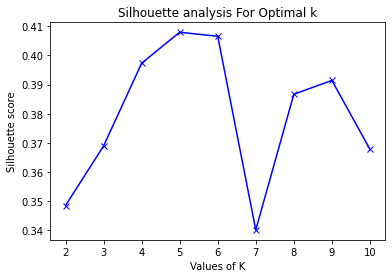

In [ ]:
### Silhouette score
import random
random.seed(42)
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_2014)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_2014, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
km = KMeans(
    n_clusters=4, init='random',
    n_init=20, max_iter=300, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(df_2014)
df_2014_scaled= np.array(df_2014)

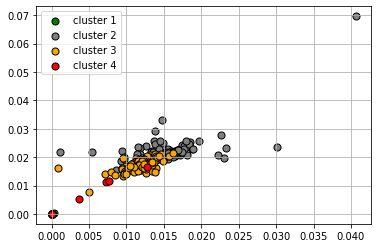

In [ ]:
## plot the clusters
plt.scatter(
    df_2014_scaled[y_km == 0, 0], df_2014_scaled[y_km == 0, 1],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_2014_scaled[y_km == 1, 0],df_2014_scaled[y_km == 1, 1],
    s=50, c='grey',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    df_2014_scaled[y_km == 2, 0], df_2014_scaled[y_km == 2, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    df_2014_scaled[y_km == 3, 0], df_2014_scaled[y_km == 3, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 4'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

The 3 prominent colors on the chart represent the 3 major types of eclectricity consumers which are the high users, moderate users and low users.


## B) Cluster Average Hourly Consumption [6 points]

Now we are going to aggregate our data by the "hour of day" to see if we can reveal any additional patterns.

To do this, we are simply going to extract the 'hour' from each timestamp in our dataset, then group by hour across the entire year. Note that this is different from doing an hourly groupby as we are aggregating across the entire year (e.g. we take the mean of all values that took place at 2pm, regardless of what day they occured on). This will give us each consumer's "average hourly consumption" in 2014. We can then perform clustering just as we did above. 

Once you've found your optimal number of clusters, try to find relationships between these clusters. Are there any salient patterns or trends that jump out at you?

>**NOTE: This time we do not scale the data for you, so you will need to experiment with different scaling techniques prior to training a model.**

In [ ]:
# Isolate  2014
df_2014 = df[df.index.year.isin([2014])].copy()

# Drop users with 0 consumption in selected year
users_with_zero_consumption = df.columns[df_2014.sum()==0]
print("Dropping users with zero consumption:", users_with_zero_consumption)
df_2014 = df_2014.drop(users_with_zero_consumption, axis=1)

# Extract hour [0,23]
df_2014['hour'] = df_2014.index.hour

# Groupby and aggregate by hour
df_hourly = df_2014.groupby('hour').mean()

Dropping users with zero consumption: Index(['MT_223'], dtype='object')


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_hourly_scaled = scaler.fit_transform(df_hourly)

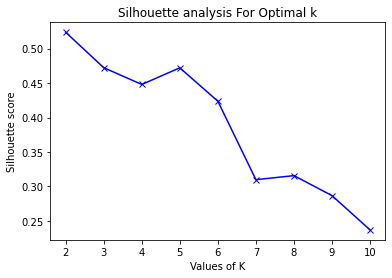

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(df_hourly_scaled)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(df_hourly_scaled, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [ ]:
km = KMeans(
    n_clusters=5, init='random',
    n_init=20, max_iter=300, 
    tol=1e-04, random_state=42
)
y_km = km.fit_predict(df_hourly_scaled)
df_hourly_scaled= np.array(df_hourly_scaled)

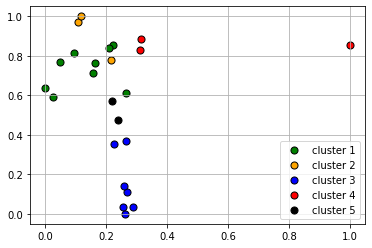

In [ ]:
## plot the clusters
plt.scatter(
    df_hourly_scaled[y_km == 0, 0], df_hourly_scaled[y_km == 0, 1],
    s=50, c='green',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    df_hourly_scaled[y_km == 1, 0],df_hourly_scaled[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    df_hourly_scaled[y_km == 2, 0], df_hourly_scaled[y_km == 2, 1],
    s=50, c='blue',
    marker='o', edgecolor='black',
    label='cluster 3'
)

plt.scatter(
    df_hourly_scaled[y_km == 3, 0], df_hourly_scaled[y_km == 3, 1],
    s=50, c='red',
    marker='o', edgecolor='black',
    label='cluster 4'
)

plt.scatter(
    df_hourly_scaled[y_km == 4, 0], df_hourly_scaled[y_km == 4, 1],
    s=50, c='black',
    marker='o', edgecolor='black',
    label='cluster 5'
)

plt.legend(scatterpoints=1,loc=4)
plt.grid()
plt.show()

## C) Cluster Analysis [3 points]

Now let's compare the clusters found in section *2.A)* to the clusters found in section *2.B)* (and perhaps even to the clusters you manually created in section *1.D)*. Do the clusters overlap at all? Why might this be the case? Please elaborate on your analysis in simple business-friendly language. 

The clusters in section 2.B (hourly consumption clustering) are clearly separated from each other compared to the clusters in section 2.A. Only one instance of a cluster overlapped with another cluster, this might be due to errors in the training of the K-means algorithm. 

The clusters indicate that there are some users that consume low, moderate, above moderate and high levels of elctricity on an hourly basis.